In [5]:
from web_scr import Scraper
import pandas as pd

In [6]:
sc = Scraper()
dane = sc.scrape_pages(20)

Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no a

In [7]:
unique_keys = set()
for item in dane:
    for d in item:
        unique_keys.update(d.keys())

flat_dict = {key: [] for key in unique_keys}

for item in dane:
    temp_dict = {}
    for d in item:
        temp_dict.update(d)
    for key in flat_dict.keys():
        flat_dict[key].append(temp_dict.get(key, None))

df = pd.DataFrame(flat_dict)
df.to_csv('dane.csv', index=False)

In [8]:
df

,Leasing,Spalanie W Cyklu Mieszanym,Generacja,Skrzynia biegów,Rok produkcji,Kierownica po prawej (Anglik),Pojemność skokowa,Pojemność baterii,Liczba pozostałych rat,Kraj pochodzenia,...,Okres gwarancji producenta,Pokaż oferty z numerem VIN,Pierwszy właściciel (od nowości),Serwisowany w ASO,Liczba miejsc,Marka pojazdu,Spalanie W Mieście,Uszkodzony,Średnie zużycie,Typ nadwozia
0,Tak,None,K (2015-2021),Manualna,2019,None,1 199 cm3,None,None,Polska,...,None,Tak,Tak,Tak,5,Opel,None,None,None,Kompakt
1,None,None,I (2010-2018),Manualna,2014,None,1 997 cm3,None,None,Belgia,...,None,Tak,None,None,5,Peugeot,None,None,None,Kombi
2,Tak,None,R231 (2012-2020),Automatyczna,2023,None,3 982 cm3,None,None,Polska,...,None,Tak,Tak,Tak,4,Mercedes-Benz,None,None,None,Kabriolet
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,None,I (2002-2013),Manualna,2012,None,1 753 cm3,None,None,Austria,...,None,Tak,None,None,2,Ford,None,None,None,Minivan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,None,None,II (2007-2014),Manualna,2012,None,1 197 cm3,None,None,Polska,...,None,Tak,None,None,5,Skoda,6 l/100km,None,None,Auta miejskie
709,Tak,None,G20/G21 (2019-),Automatyczna,2021,None,1 995 cm3,None,None,Polska,...,13 Kwietnia 2024,Tak,Tak,Tak,5,BMW,None,None,None,Kombi
710,None,None,T5,Manualna,2005,None,1 896 cm3,None,None,Polska,...,None,Tak,None,Tak,9,Volkswagen,None,None,None,Minivan
711,None,None,II FL (2003-),Manualna,2011,None,1 242 cm3,None,None,None,...,None,Tak,None,None,4,Fiat,None,None,None,Kompakt


## Analiza danych 
 1. Jaka marka jest najczęściej? 
 2. Wykres cen (histogram) 
 3. Wykres roku produkcji (histogram) 
 4. Procent aut z skrzynią biegów (wykres kołowy) 
 5. Procent ofert od prywatnych i firm
 6. Wykres typów 


In [19]:
marki_num= df.groupby('Marka pojazdu').size().reset_index(name='ilość')

In [20]:
marki_num

,Marka pojazdu,ilość
0,Audi,51
1,BMW,66
2,Cadillac,1
3,Chevrolet,4
4,Chrysler,1
5,Citroën,12
6,Cupra,5
7,Dacia,5
8,Dodge,4
9,Fiat,7


In [21]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Mercedes-Benz'),
  Text(1, 0, 'Volkswagen'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'Audi'),
  Text(4, 0, 'Opel'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Volvo'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Peugeot'),
  Text(9, 0, 'Skoda'),
  Text(10, 0, 'Kia'),
  Text(11, 0, 'Renault'),
  Text(12, 0, 'Seat'),
  Text(13, 0, 'Hyundai'),
  Text(14, 0, 'Citroën'),
  Text(15, 0, 'Nissan'),
  Text(16, 0, 'Jeep'),
  Text(17, 0, 'Mazda'),
  Text(18, 0, 'Honda'),
  Text(19, 0, 'Lexus')])

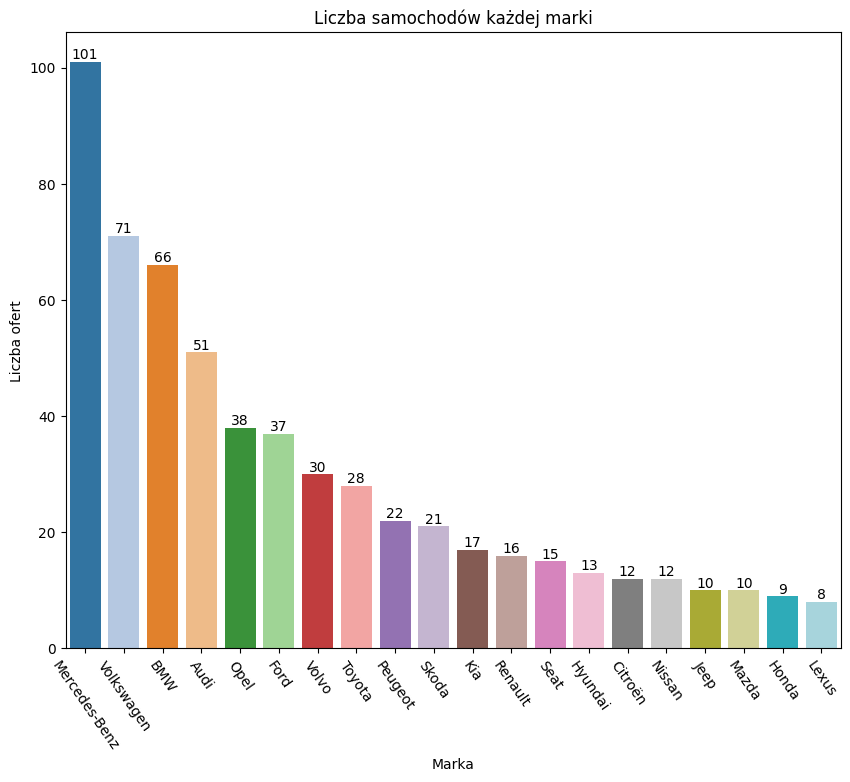

In [42]:
plt.figure(figsize=(10, 8))  
ax = sns.barplot(x='Marka pojazdu', y='ilość', data=marki_num.sort_values(by='ilość', ascending=False).head(20), orient='v', palette='tab20')
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Marka')
plt.ylabel('Liczba ofert')
plt.title('Liczba samochodów każdej marki')
plt.xticks(rotation=305) 

In [55]:
ceny = df['Cena']
ceny

0       54 900
1       29 500
2      962 599
3         None
4       19 900
        ...   
708     25 000
709    134 000
710     28 000
711     23 000
712       None
Name: Cena, Length: 713, dtype: object